In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [2]:
df = pd.read_csv('./BigML_Steel_Plates_Faults.csv')
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [3]:
col = df.columns
col

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Fault'],
      dtype='object')

In [4]:
X = df[col].drop('Fault', 1)
Y = df['Fault']

In [5]:
display(X.describe(include = 'all'))

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800


In [6]:
# Data preprocessing
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


In [7]:
display(X.describe(include = 'all'))

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800


In [8]:
x_np = np.asarray(X)

In [9]:
x_np

array([[42, 50, 270900, ..., 0.8182, -0.2913, 0.5822],
       [645, 651, 2538079, ..., 0.7931, -0.1756, 0.2984],
       [829, 835, 1553913, ..., 0.6667, -0.1228, 0.215],
       ...,
       [145, 174, 386779, ..., -0.4828, 0.0052, 0.7079],
       [137, 170, 422497, ..., -0.0606, -0.0171, 0.9919],
       [1261, 1281, 87951, ..., -0.2, -0.1139, 0.5296]], dtype=object)

In [10]:
x_norm = x_np.copy()

x_min = np.min(x_norm, axis = 0)
x_norm = np.subtract(x_norm, x_min)

In [11]:
x_np

array([[42, 50, 270900, ..., 0.8182, -0.2913, 0.5822],
       [645, 651, 2538079, ..., 0.7931, -0.1756, 0.2984],
       [829, 835, 1553913, ..., 0.6667, -0.1228, 0.215],
       ...,
       [145, 174, 386779, ..., -0.4828, 0.0052, 0.7079],
       [137, 170, 422497, ..., -0.0606, -0.0171, 0.9919],
       [1261, 1281, 87951, ..., -0.2, -0.1139, 0.5296]], dtype=object)

In [12]:
x_min

array([0, 4, 6712, 6724, 2, 2, 1, 250, 0, 37, 1227, False, False, 40, 0.0,
       0.0, 0.0083, 0.0015, 0.0144, 0.0484, 0.0, 0.301, 0.301, 0.0,
       -0.991, -0.9989, 0.11900000000000001], dtype=object)

In [13]:
x_norm

array([[42, 46, 264188, ..., 1.8092000000000001, 0.7076,
        0.46320000000000006],
       [645, 647, 2531367, ..., 1.7841, 0.8233, 0.1794],
       [829, 831, 1547201, ..., 1.6577, 0.8761, 0.09599999999999999],
       ...,
       [145, 170, 380067, ..., 0.5082, 1.0041, 0.5889],
       [137, 166, 415785, ..., 0.9304, 0.9818, 0.8729],
       [1261, 1277, 81239, ..., 0.7909999999999999, 0.885,
        0.41059999999999997]], dtype=object)

In [14]:
x_max = np.max(x_norm, axis = 0)
x_norm /= (1.2*x_max)

In [15]:
x_max

array([1705, 1709, 12980949, 12980968, 152653, 10447, 18151, 11591164,
       203, 216, 567, 1, 1, 260, 0.9952, 0.9439, 0.9917,
       0.8744000000000001, 0.9856, 0.9516, 1.0, 4.8827, 2.7731, 4.2587,
       1.9827, 1.641, 0.881], dtype=object)

In [16]:
(1.2*x_max)

array([2046.0, 2050.7999999999997, 15577138.799999999, 15577161.6,
       183183.6, 12536.4, 21781.2, 13909396.799999999, 243.6, 259.2,
       680.4, 1.2, 1.2, 312.0, 1.19424, 1.13268, 1.19004, 1.04928,
       1.18272, 1.14192, 1.2, 5.85924, 3.32772, 5.11044, 2.37924,
       1.9691999999999998, 1.0572], dtype=object)

In [17]:
x_norm

array([[0.020527859237536656, 0.022430271113711726, 0.016959982407038707,
        ..., 0.7604108875102975, 0.3593337395896811, 0.4381384790011352],
       [0.3152492668621701, 0.3154866393602497, 0.1625052605938133, ...,
        0.7498613002471378, 0.4180885638838107, 0.16969353007945517],
       [0.4051808406647116, 0.4052077238150966, 0.09932510840822707, ...,
        0.6967350918780788, 0.4449014828356693, 0.09080590238365494],
       ...,
       [0.07086999022482894, 0.08289448020284768, 0.02439902506357586,
        ..., 0.21359761940787816, 0.5099024984765387, 0.5570374574347333],
       [0.06695992179863147, 0.08094402184513362, 0.02669200071581824,
        ..., 0.39104924261528895, 0.498578102782856, 0.8256715853197125],
       [0.6163245356793744, 0.6226838307002146, 0.005215270984168159,
        ..., 0.3324591045880197, 0.4494210847044485, 0.38838441165342413]],
      dtype=object)

In [18]:
np.max(x_norm)

0.8333333333333335

In [19]:
x_norm.shape

(1941, 27)

In [20]:
Y

0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Name: Fault, Length: 1941, dtype: object

In [21]:
labels = list(np.unique(Y))
labels

['Bumps',
 'Dirtiness',
 'K_Scatch',
 'Other_Faults',
 'Pastry',
 'Stains',
 'Z_Scratch']

In [22]:
label_dict = {}

for i, l in zip(range(len(labels)), labels):
    label_dict[l] = i
    
label_dict

{'Bumps': 0,
 'Dirtiness': 1,
 'K_Scatch': 2,
 'Other_Faults': 3,
 'Pastry': 4,
 'Stains': 5,
 'Z_Scratch': 6}

In [23]:
y_class = np.zeros(Y.shape)

for i in range(len(Y)):
    y_class[i] =  label_dict[Y[i]]

In [24]:
def one_hot_encoding(y):
    y_ = np.zeros([len(y), np.max(y) + 1])
    for i in range(len(y)):
        y_[i, y[i]] = 1  
    return y_.astype('uint8')

In [25]:
y_ohe = one_hot_encoding(y_class.astype('uint8'))

In [26]:
y_ohe

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
y_ohe.shape

(1941, 7)

In [28]:
# ANN
n_input = 27
n_hidden1 = 100
n_hidden2 = 50
n_output = 7

In [29]:
tf.reset_default_graph()

weights = {
    'hidden1' : tf.Variable(tf.random_normal([n_input, n_hidden1], stddev = 0.1)),
    'hidden2' : tf.Variable(tf.random_normal([n_hidden1, n_hidden2], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden2, n_output], stddev = 0.1))
}

biases = {
    'hidden1' : tf.Variable(tf.random_normal([n_hidden1], stddev = 0.1)),
    'hidden2' : tf.Variable(tf.random_normal([n_hidden2], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1))
}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])
lr = tf.placeholder(tf.float32)

In [30]:
# Define Network
def base_model(x, weights, biases):
        
    for i in range(1, 3):
        if i == 1:
            hidden = tf.add(tf.matmul(x, weights['hidden{}'.format(i)]), biases['hidden{}'.format(i)])
            hidden = tf.nn.relu(hidden)
        else:
            hidden = tf.add(tf.matmul(hidden, weights['hidden{}'.format(i)]), biases['hidden{}'.format(i)])
            hidden = tf.nn.relu(hidden)

    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])
    
    return output

pred = base_model(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred, labels = y)
loss = tf.reduce_mean(loss)
optm = tf.train.AdamOptimizer(lr).minimize(loss)

In [31]:
# train_valid_split
def train_valid_split(x, y, test_rate = 0.2):
    v_idx = np.random.choice(len(x), size = int(len(x)*test_rate), replace = False)
    t_idx = np.setdiff1d(np.arange(len(x)), v_idx)
    return x[t_idx], y[t_idx], x[v_idx], y[v_idx]

# for minibatch gradient descent
def minibatch(x, y, batch_size = None):
    idx = np.random.choice(len(x), batch_size, replace=False)
    return x[idx], y[idx]

In [32]:
# Not normalize VS Normalize
train_X, train_Y, valid_X, valid_Y = train_valid_split(x_np, y_ohe)

In [33]:
train_X_n, train_Y_n, valid_X_n, valid_Y_n = train_valid_split(x_norm, y_ohe)

In [34]:
n_batch = 64    # Batch Size
n_iter = 30000   # Learning Iteration
n_prt = 100    # Print Cycle
LR = 0.001

In [35]:
%%time

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

loss_record_train, accr_record_train = [], []

for epoch in range(n_iter):
    train_x, train_y = minibatch(train_X, train_Y, n_batch) # 학습할 데이터를 가져옴
    sess.run(optm, feed_dict = {x: train_x, y: train_y, lr: LR}) # 학습 
    
    # 학습한 내용 tracking (학습을 하진 않는다)
    if epoch % n_prt == 0:        
        cost, score = sess.run([loss, pred], feed_dict = {x: train_x, y: train_y})
        
        true = np.argmax(train_y, axis = 1)
        score = np.argmax(score, axis = 1)
        
        accr = np.mean(np.equal(true, score))
        
        loss_record_train.append(cost)
        accr_record_train.append(accr)
        
        print ("Iter {:05d} || train_loss: {:.4f} || train_accr: {:.2f}%".format(epoch, cost, 100*accr))

Iter 00000 || train_loss: 127195.4688 || train_accr: 4.69%
Iter 00100 || train_loss: 2620.8406 || train_accr: 46.88%
Iter 00200 || train_loss: 3751.9800 || train_accr: 29.69%
Iter 00300 || train_loss: 7244.5889 || train_accr: 45.31%
Iter 00400 || train_loss: 2181.1851 || train_accr: 50.00%
Iter 00500 || train_loss: 3306.0635 || train_accr: 40.62%
Iter 00600 || train_loss: 3566.0015 || train_accr: 39.06%
Iter 00700 || train_loss: 2918.0156 || train_accr: 42.19%
Iter 00800 || train_loss: 3805.2415 || train_accr: 51.56%
Iter 00900 || train_loss: 2219.1780 || train_accr: 48.44%
Iter 01000 || train_loss: 1611.0479 || train_accr: 50.00%
Iter 01100 || train_loss: 1055.5613 || train_accr: 46.88%
Iter 01200 || train_loss: 2300.8022 || train_accr: 51.56%
Iter 01300 || train_loss: 1373.6792 || train_accr: 25.00%
Iter 01400 || train_loss: 2111.7979 || train_accr: 28.12%
Iter 01500 || train_loss: 1420.5735 || train_accr: 57.81%
Iter 01600 || train_loss: 574.2783 || train_accr: 45.31%
Iter 01700 || 

Iter 14800 || train_loss: 1.7032 || train_accr: 29.69%
Iter 14900 || train_loss: 1.8018 || train_accr: 35.94%
Iter 15000 || train_loss: 1.7689 || train_accr: 34.38%
Iter 15100 || train_loss: 1.7391 || train_accr: 26.56%
Iter 15200 || train_loss: 1.7533 || train_accr: 29.69%
Iter 15300 || train_loss: 1.5402 || train_accr: 39.06%
Iter 15400 || train_loss: 1.5950 || train_accr: 37.50%
Iter 15500 || train_loss: 1.7529 || train_accr: 35.94%
Iter 15600 || train_loss: 1.6512 || train_accr: 34.38%
Iter 15700 || train_loss: 1.6633 || train_accr: 31.25%
Iter 15800 || train_loss: 1.5932 || train_accr: 42.19%
Iter 15900 || train_loss: 1.8037 || train_accr: 37.50%
Iter 16000 || train_loss: 1.5273 || train_accr: 45.31%
Iter 16100 || train_loss: 1.6066 || train_accr: 32.81%
Iter 16200 || train_loss: 1.6273 || train_accr: 39.06%
Iter 16300 || train_loss: 1.7896 || train_accr: 28.12%
Iter 16400 || train_loss: 1.6795 || train_accr: 34.38%
Iter 16500 || train_loss: 1.7434 || train_accr: 35.94%
Iter 16600

Iter 29700 || train_loss: 1.6443 || train_accr: 28.12%
Iter 29800 || train_loss: 1.7038 || train_accr: 26.56%
Iter 29900 || train_loss: 1.6092 || train_accr: 35.94%
CPU times: user 2min 23s, sys: 25.8 s, total: 2min 49s
Wall time: 1min 21s


In [36]:
%%time

sess = tf.Session()
sess.run(init)

loss_n_record_train, accr_n_record_train = [], []

for epoch in range(n_iter):
    train_x, train_y = minibatch(train_X_n, train_Y_n, n_batch)
    sess.run(optm, feed_dict = {x: train_x, y: train_y, lr: LR})
    
    if epoch % n_prt == 0:        
        cost, score = sess.run([loss, pred], feed_dict = {x: train_x, y: train_y})
        
        true = np.argmax(train_y, axis = 1)
        score = np.argmax(score, axis = 1)
        
        accr = np.mean(np.equal(true, score))
        
        loss_n_record_train.append(cost), accr_n_record_train.append(accr)
        
        print ("Iter {:05d} || train_loss: {:.4f} || train_accr: {:.2f}%".format(epoch, cost, 100*accr))

Iter 00000 || train_loss: 1.9095 || train_accr: 25.00%
Iter 00100 || train_loss: 1.1362 || train_accr: 54.69%
Iter 00200 || train_loss: 0.8542 || train_accr: 67.19%
Iter 00300 || train_loss: 1.0775 || train_accr: 62.50%
Iter 00400 || train_loss: 0.8724 || train_accr: 67.19%
Iter 00500 || train_loss: 0.7001 || train_accr: 71.88%
Iter 00600 || train_loss: 0.8675 || train_accr: 64.06%
Iter 00700 || train_loss: 0.5805 || train_accr: 75.00%
Iter 00800 || train_loss: 0.8244 || train_accr: 64.06%
Iter 00900 || train_loss: 0.6921 || train_accr: 75.00%
Iter 01000 || train_loss: 0.6250 || train_accr: 75.00%
Iter 01100 || train_loss: 0.8157 || train_accr: 75.00%
Iter 01200 || train_loss: 0.6484 || train_accr: 75.00%
Iter 01300 || train_loss: 0.5084 || train_accr: 78.12%
Iter 01400 || train_loss: 0.6130 || train_accr: 75.00%
Iter 01500 || train_loss: 0.6349 || train_accr: 73.44%
Iter 01600 || train_loss: 0.4110 || train_accr: 84.38%
Iter 01700 || train_loss: 0.5034 || train_accr: 76.56%
Iter 01800

Iter 14900 || train_loss: 0.0788 || train_accr: 100.00%
Iter 15000 || train_loss: 0.1908 || train_accr: 93.75%
Iter 15100 || train_loss: 0.1568 || train_accr: 93.75%
Iter 15200 || train_loss: 0.2007 || train_accr: 92.19%
Iter 15300 || train_loss: 0.2559 || train_accr: 90.62%
Iter 15400 || train_loss: 0.2278 || train_accr: 90.62%
Iter 15500 || train_loss: 0.1652 || train_accr: 98.44%
Iter 15600 || train_loss: 0.0837 || train_accr: 100.00%
Iter 15700 || train_loss: 0.1897 || train_accr: 90.62%
Iter 15800 || train_loss: 0.1863 || train_accr: 92.19%
Iter 15900 || train_loss: 0.1404 || train_accr: 96.88%
Iter 16000 || train_loss: 0.1398 || train_accr: 93.75%
Iter 16100 || train_loss: 0.2701 || train_accr: 81.25%
Iter 16200 || train_loss: 0.1804 || train_accr: 95.31%
Iter 16300 || train_loss: 0.1317 || train_accr: 98.44%
Iter 16400 || train_loss: 0.1038 || train_accr: 96.88%
Iter 16500 || train_loss: 0.1215 || train_accr: 98.44%
Iter 16600 || train_loss: 0.1239 || train_accr: 96.88%
Iter 167

Iter 29800 || train_loss: 0.0916 || train_accr: 96.88%
Iter 29900 || train_loss: 0.0360 || train_accr: 100.00%
CPU times: user 2min 18s, sys: 24.6 s, total: 2min 43s
Wall time: 1min 16s


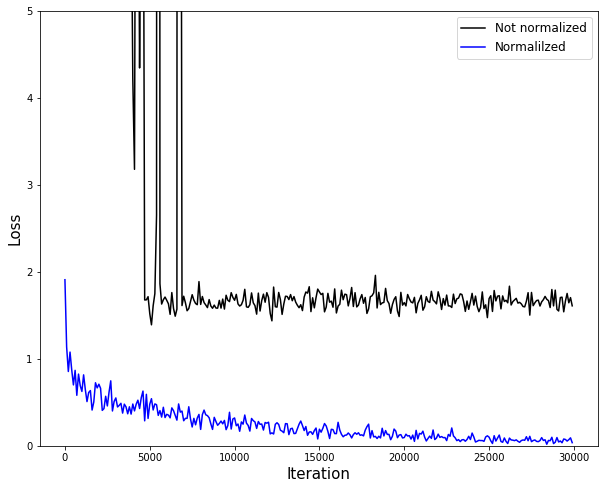

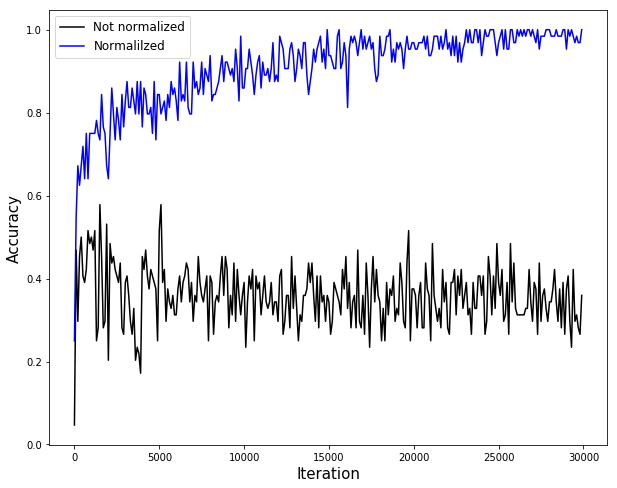

In [37]:
not_n_alpha = 1
n_alpha = 1

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'k-', alpha = not_n_alpha, label = 'Not normalized')
plt.plot(np.arange(len(loss_n_record_train))*n_prt, loss_n_record_train, 'b-', alpha = n_alpha,  label = 'Normalilzed')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.ylim([0, 5])
plt.legend(fontsize = 12)
plt.show()
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(accr_record_train))*n_prt, accr_record_train, 'k-', alpha = not_n_alpha, label = 'Not normalized')
plt.plot(np.arange(len(accr_n_record_train))*n_prt, accr_n_record_train, 'b-', alpha = n_alpha,  label = 'Normalilzed')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [38]:
# Batch Normalization
is_training = tf.placeholder(tf.bool) # BN

def BN_model(x, weights, biases, is_training):
    
    for i in range(1, 3):
        if i == 1:
            hidden = tf.add(tf.matmul(x, weights['hidden{}'.format(i)]), biases['hidden{}'.format(i)])
            hidden = tf.layers.batch_normalization(hidden, training = is_training)
            hidden = tf.nn.relu(hidden)
        else:
            hidden = tf.add(tf.matmul(hidden, weights['hidden{}'.format(i)]), biases['hidden{}'.format(i)])
            hidden = tf.layers.batch_normalization(hidden, training = is_training)
            hidden = tf.nn.relu(hidden)

    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])
    
    return output

BN_pred = BN_model(x, weights, biases, is_training)
BN_loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits = BN_pred, labels = y)
BN_loss = tf.reduce_mean(BN_loss)
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    BN_optm = tf.train.AdamOptimizer(lr).minimize(BN_loss)

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


In [39]:
%%time

BN_init = tf.global_variables_initializer()
BN_sess = tf.Session()
BN_sess.run(BN_init)

BN_loss_record_train, BN_accr_record_train = [], []

for epoch in range(n_iter):
    train_x, train_y = minibatch(train_X_n, train_Y_n, n_batch)
#     print(train_x.shape, train_y.shape)
    BN_sess.run(BN_optm, feed_dict = {x: train_x, y: train_y, is_training: True, lr: LR})
    
    if epoch % n_prt == 0:        
        BN_cost, BN_score = BN_sess.run([BN_loss, BN_pred], feed_dict = {x: train_x, y: train_y, is_training: False})
        
        true = np.argmax(train_y, axis = 1)
        BN_score = np.argmax(BN_score, axis = 1)
        
        BN_accr = np.mean(np.equal(true, BN_score))
        
        BN_loss_record_train.append(BN_cost), BN_accr_record_train.append(BN_accr)
        
        print ("Iter {:05d} || train_loss: {:.4f} || train_accr: {:.2f}%".format(epoch,  BN_cost, 100*BN_accr))


Iter 00000 || train_loss: 1.8956 || train_accr: 28.12%
Iter 00100 || train_loss: 1.5074 || train_accr: 56.25%
Iter 00200 || train_loss: 1.2556 || train_accr: 64.06%
Iter 00300 || train_loss: 1.1582 || train_accr: 51.56%
Iter 00400 || train_loss: 0.8011 || train_accr: 73.44%
Iter 00500 || train_loss: 0.5410 || train_accr: 82.81%
Iter 00600 || train_loss: 0.4659 || train_accr: 84.38%
Iter 00700 || train_loss: 0.3308 || train_accr: 85.94%
Iter 00800 || train_loss: 0.3106 || train_accr: 87.50%
Iter 00900 || train_loss: 0.2385 || train_accr: 92.19%
Iter 01000 || train_loss: 0.3814 || train_accr: 85.94%
Iter 01100 || train_loss: 0.2929 || train_accr: 93.75%
Iter 01200 || train_loss: 0.2931 || train_accr: 85.94%
Iter 01300 || train_loss: 0.1423 || train_accr: 96.88%
Iter 01400 || train_loss: 0.2072 || train_accr: 96.88%
Iter 01500 || train_loss: 0.2630 || train_accr: 89.06%
Iter 01600 || train_loss: 0.1628 || train_accr: 96.88%
Iter 01700 || train_loss: 0.2188 || train_accr: 90.62%
Iter 01800

Iter 14800 || train_loss: 0.0025 || train_accr: 100.00%
Iter 14900 || train_loss: 0.0056 || train_accr: 100.00%
Iter 15000 || train_loss: 0.0074 || train_accr: 100.00%
Iter 15100 || train_loss: 0.0062 || train_accr: 100.00%
Iter 15200 || train_loss: 0.0226 || train_accr: 98.44%
Iter 15300 || train_loss: 0.0064 || train_accr: 100.00%
Iter 15400 || train_loss: 0.0011 || train_accr: 100.00%
Iter 15500 || train_loss: 0.0036 || train_accr: 100.00%
Iter 15600 || train_loss: 0.0186 || train_accr: 98.44%
Iter 15700 || train_loss: 0.0197 || train_accr: 98.44%
Iter 15800 || train_loss: 0.0033 || train_accr: 100.00%
Iter 15900 || train_loss: 0.0057 || train_accr: 100.00%
Iter 16000 || train_loss: 0.0072 || train_accr: 100.00%
Iter 16100 || train_loss: 0.0070 || train_accr: 100.00%
Iter 16200 || train_loss: 0.0053 || train_accr: 100.00%
Iter 16300 || train_loss: 0.0051 || train_accr: 100.00%
Iter 16400 || train_loss: 0.0620 || train_accr: 98.44%
Iter 16500 || train_loss: 0.0610 || train_accr: 96.8

Iter 29500 || train_loss: 0.0063 || train_accr: 100.00%
Iter 29600 || train_loss: 0.0021 || train_accr: 100.00%
Iter 29700 || train_loss: 0.0223 || train_accr: 98.44%
Iter 29800 || train_loss: 0.0018 || train_accr: 100.00%
Iter 29900 || train_loss: 0.0023 || train_accr: 100.00%
CPU times: user 4min 14s, sys: 45 s, total: 4min 59s
Wall time: 1min 56s


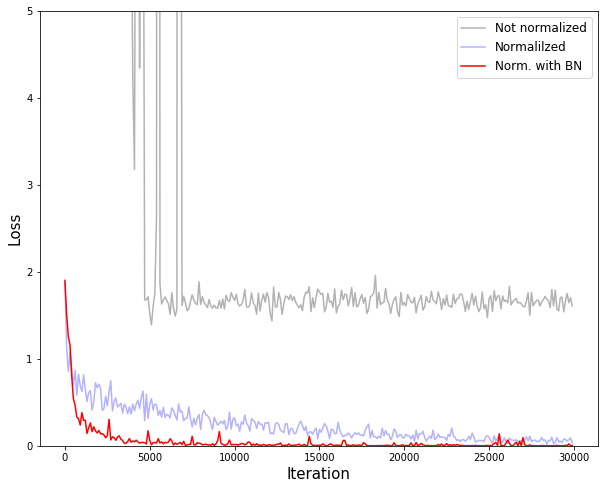

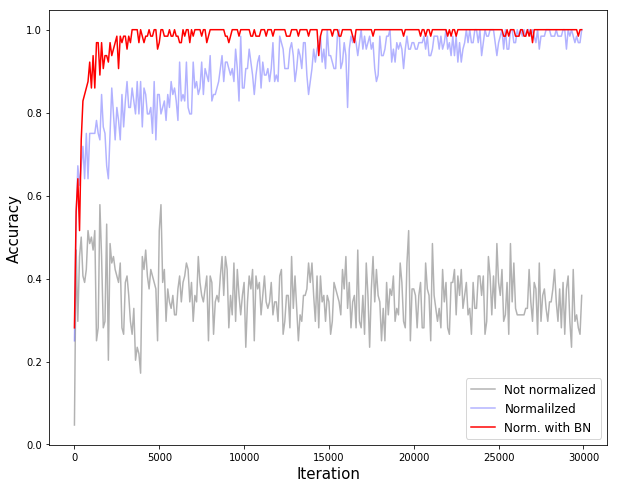

In [40]:
not_n_alpha = 0.3
n_alpha = 0.3
bn_alpha = 1

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'k-', alpha = not_n_alpha, label = 'Not normalized')
plt.plot(np.arange(len(loss_n_record_train))*n_prt, loss_n_record_train, 'b-', alpha = n_alpha,  label = 'Normalilzed')
plt.plot(np.arange(len(BN_loss_record_train))*n_prt, BN_loss_record_train, 'r-', alpha = bn_alpha,  label = 'Norm. with BN')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.ylim([0, 5])
plt.legend(fontsize = 12)
plt.show()
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(accr_record_train))*n_prt, accr_record_train, 'k-', alpha = not_n_alpha, label = 'Not normalized')
plt.plot(np.arange(len(accr_n_record_train))*n_prt, accr_n_record_train, 'b-', alpha = n_alpha,  label = 'Normalilzed')
plt.plot(np.arange(len(BN_accr_record_train))*n_prt, BN_accr_record_train, 'r-', alpha = bn_alpha,  label = 'Norm. with BN')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [43]:
# Validation to check "Overfitting"
sess = tf.Session()
sess.run(init)

loss_n_record_train, accr_n_record_train = [], []
loss_n_record_valid, accr_n_record_valid = [], []

for epoch in range(n_iter):
    train_x, train_y = minibatch(train_X_n, train_Y_n, n_batch)
    sess.run(optm, feed_dict = {x: train_x, y: train_y, lr: LR}) 
    
    if epoch % n_prt == 0:        
        # validation data 추출
        valid_x, valid_y = minibatch(valid_X_n, valid_Y_n, n_batch)
        cost, score = sess.run([loss, pred], feed_dict = {x: train_x, y: train_y})
        cost_v, score_v = sess.run([loss, pred], feed_dict = {x: valid_x, y: valid_y})
        
        true = np.argmax(train_y, axis = 1)
        score = np.argmax(score, axis = 1)
        true_v = np.argmax(valid_y, axis = 1)
        score_v = np.argmax(score_v, axis = 1)
        
        accr = np.mean(np.equal(true, score))
        accr_v = np.mean(np.equal(true_v, score_v))
        
        loss_n_record_train.append(cost), accr_n_record_train.append(accr)
        loss_n_record_valid.append(cost_v), accr_n_record_valid.append(accr_v)
        
        print ("Iter {:05d} || train_loss: {:.4f} || train_accr: {:.2f}% || valid_loss: {:.4f} || valid_accr: {:.2f}%".format(epoch, 
                                                                                                                              cost, 100*accr, 
                                                                                                                              cost_v, 100*accr_v))

Iter 00000 || train_loss: 1.9293 || train_accr: 7.81% || valid_loss: 1.9226 || valid_accr: 3.12%
Iter 00100 || train_loss: 1.1930 || train_accr: 59.38% || valid_loss: 1.2968 || valid_accr: 46.88%
Iter 00200 || train_loss: 0.9942 || train_accr: 64.06% || valid_loss: 0.9540 || valid_accr: 59.38%
Iter 00300 || train_loss: 0.8282 || train_accr: 65.62% || valid_loss: 1.0929 || valid_accr: 56.25%
Iter 00400 || train_loss: 0.9312 || train_accr: 64.06% || valid_loss: 0.8262 || valid_accr: 71.88%
Iter 00500 || train_loss: 0.6856 || train_accr: 65.62% || valid_loss: 0.6196 || valid_accr: 73.44%
Iter 00600 || train_loss: 0.7178 || train_accr: 75.00% || valid_loss: 0.8671 || valid_accr: 64.06%
Iter 00700 || train_loss: 0.7535 || train_accr: 70.31% || valid_loss: 0.6761 || valid_accr: 75.00%
Iter 00800 || train_loss: 0.6450 || train_accr: 68.75% || valid_loss: 0.6844 || valid_accr: 81.25%
Iter 00900 || train_loss: 0.7410 || train_accr: 79.69% || valid_loss: 0.7705 || valid_accr: 75.00%
Iter 01000 |

Iter 08300 || train_loss: 0.4013 || train_accr: 81.25% || valid_loss: 1.3409 || valid_accr: 64.06%
Iter 08400 || train_loss: 0.2856 || train_accr: 89.06% || valid_loss: 0.7177 || valid_accr: 79.69%
Iter 08500 || train_loss: 0.3650 || train_accr: 84.38% || valid_loss: 0.4581 || valid_accr: 81.25%
Iter 08600 || train_loss: 0.2681 || train_accr: 90.62% || valid_loss: 0.4834 || valid_accr: 84.38%
Iter 08700 || train_loss: 0.3202 || train_accr: 85.94% || valid_loss: 0.7373 || valid_accr: 73.44%
Iter 08800 || train_loss: 0.3010 || train_accr: 89.06% || valid_loss: 0.8371 || valid_accr: 71.88%
Iter 08900 || train_loss: 0.2282 || train_accr: 90.62% || valid_loss: 0.6579 || valid_accr: 76.56%
Iter 09000 || train_loss: 0.2789 || train_accr: 87.50% || valid_loss: 1.2656 || valid_accr: 76.56%
Iter 09100 || train_loss: 0.3614 || train_accr: 85.94% || valid_loss: 1.2359 || valid_accr: 75.00%
Iter 09200 || train_loss: 0.4122 || train_accr: 82.81% || valid_loss: 0.9747 || valid_accr: 65.62%
Iter 09300

Iter 16600 || train_loss: 0.2406 || train_accr: 85.94% || valid_loss: 1.2749 || valid_accr: 64.06%
Iter 16700 || train_loss: 0.1783 || train_accr: 93.75% || valid_loss: 0.9566 || valid_accr: 73.44%
Iter 16800 || train_loss: 0.2058 || train_accr: 90.62% || valid_loss: 0.8581 || valid_accr: 75.00%
Iter 16900 || train_loss: 0.2474 || train_accr: 89.06% || valid_loss: 1.6450 || valid_accr: 70.31%
Iter 17000 || train_loss: 0.1639 || train_accr: 96.88% || valid_loss: 0.5699 || valid_accr: 82.81%
Iter 17100 || train_loss: 0.1294 || train_accr: 96.88% || valid_loss: 0.9708 || valid_accr: 78.12%
Iter 17200 || train_loss: 0.1961 || train_accr: 89.06% || valid_loss: 1.1133 || valid_accr: 78.12%
Iter 17300 || train_loss: 0.2327 || train_accr: 89.06% || valid_loss: 1.3182 || valid_accr: 71.88%
Iter 17400 || train_loss: 0.1549 || train_accr: 95.31% || valid_loss: 1.4260 || valid_accr: 75.00%
Iter 17500 || train_loss: 0.2052 || train_accr: 96.88% || valid_loss: 2.3362 || valid_accr: 67.19%
Iter 17600

Iter 24900 || train_loss: 0.1028 || train_accr: 96.88% || valid_loss: 0.7046 || valid_accr: 76.56%
Iter 25000 || train_loss: 0.0594 || train_accr: 100.00% || valid_loss: 1.4529 || valid_accr: 71.88%
Iter 25100 || train_loss: 0.1227 || train_accr: 93.75% || valid_loss: 1.5615 || valid_accr: 75.00%
Iter 25200 || train_loss: 0.1253 || train_accr: 95.31% || valid_loss: 1.8963 || valid_accr: 67.19%
Iter 25300 || train_loss: 0.1531 || train_accr: 92.19% || valid_loss: 2.0586 || valid_accr: 76.56%
Iter 25400 || train_loss: 0.1049 || train_accr: 96.88% || valid_loss: 1.6444 || valid_accr: 68.75%
Iter 25500 || train_loss: 0.0707 || train_accr: 100.00% || valid_loss: 2.2352 || valid_accr: 71.88%
Iter 25600 || train_loss: 0.0816 || train_accr: 98.44% || valid_loss: 2.1149 || valid_accr: 75.00%
Iter 25700 || train_loss: 0.0963 || train_accr: 98.44% || valid_loss: 2.6260 || valid_accr: 68.75%
Iter 25800 || train_loss: 0.0939 || train_accr: 98.44% || valid_loss: 2.5644 || valid_accr: 75.00%
Iter 259

In [44]:
%%time

BN_sess = tf.Session()
BN_sess.run(BN_init)

BN_loss_record_train, BN_accr_record_train = [], []
BN_loss_record_valid, BN_accr_record_valid = [], []

for epoch in range(n_iter):
    train_x, train_y = minibatch(train_X_n, train_Y_n, n_batch)
    BN_sess.run(BN_optm, feed_dict = {x: train_x, y: train_y, is_training: True, lr: LR}) 
    
    if epoch % n_prt == 0:        
        valid_x, valid_y = minibatch(valid_X_n, valid_Y_n, n_batch)
        BN_cost, BN_score = BN_sess.run([BN_loss, BN_pred], feed_dict = {x: train_x, y: train_y, is_training: False})
        BN_cost_v, BN_score_v = BN_sess.run([BN_loss, BN_pred], feed_dict = {x: valid_x, y: valid_y, is_training: False})
        
        true = np.argmax(train_y, axis = 1)
        BN_score = np.argmax(BN_score, axis = 1)
        true_v = np.argmax(valid_y, axis = 1)
        BN_score_v = np.argmax(BN_score_v, axis = 1)
        
        BN_accr = np.mean(np.equal(true, BN_score))
        BN_accr_v = np.mean(np.equal(true_v, BN_score_v))
        
        BN_loss_record_train.append(BN_cost), BN_accr_record_train.append(BN_accr)
        BN_loss_record_valid.append(BN_cost_v), BN_accr_record_valid.append(BN_accr_v)
        
        print ("Iter {:05d} || train_loss: {:.4f} || train_accr: {:.2f}% || valid_loss: {:.4f} || valid_accr: {:.2f}%".format(epoch, 
                                                                                                                              BN_cost, 100*BN_accr, 
                                                                                                                              BN_cost_v, 100*BN_accr_v))

Iter 00000 || train_loss: 1.8975 || train_accr: 35.94% || valid_loss: 1.8988 || valid_accr: 39.06%
Iter 00100 || train_loss: 1.5196 || train_accr: 37.50% || valid_loss: 1.4969 || valid_accr: 43.75%
Iter 00200 || train_loss: 1.2175 || train_accr: 48.44% || valid_loss: 1.3321 || valid_accr: 43.75%
Iter 00300 || train_loss: 1.2105 || train_accr: 45.31% || valid_loss: 1.2230 || valid_accr: 45.31%
Iter 00400 || train_loss: 0.7881 || train_accr: 68.75% || valid_loss: 0.9740 || valid_accr: 56.25%
Iter 00500 || train_loss: 0.5382 || train_accr: 79.69% || valid_loss: 0.8918 || valid_accr: 68.75%
Iter 00600 || train_loss: 0.4002 || train_accr: 84.38% || valid_loss: 0.8058 || valid_accr: 62.50%
Iter 00700 || train_loss: 0.3676 || train_accr: 87.50% || valid_loss: 0.7019 || valid_accr: 84.38%
Iter 00800 || train_loss: 0.2962 || train_accr: 93.75% || valid_loss: 0.7003 || valid_accr: 78.12%
Iter 00900 || train_loss: 0.3838 || train_accr: 84.38% || valid_loss: 0.9451 || valid_accr: 73.44%
Iter 01000

Iter 08300 || train_loss: 0.0189 || train_accr: 100.00% || valid_loss: 2.0031 || valid_accr: 70.31%
Iter 08400 || train_loss: 0.0098 || train_accr: 100.00% || valid_loss: 1.9070 || valid_accr: 70.31%
Iter 08500 || train_loss: 0.0198 || train_accr: 100.00% || valid_loss: 1.5645 || valid_accr: 81.25%
Iter 08600 || train_loss: 0.0058 || train_accr: 100.00% || valid_loss: 1.6422 || valid_accr: 73.44%
Iter 08700 || train_loss: 0.0112 || train_accr: 100.00% || valid_loss: 2.1389 || valid_accr: 65.62%
Iter 08800 || train_loss: 0.0175 || train_accr: 100.00% || valid_loss: 1.2884 || valid_accr: 73.44%
Iter 08900 || train_loss: 0.0330 || train_accr: 100.00% || valid_loss: 2.2655 || valid_accr: 68.75%
Iter 09000 || train_loss: 0.0104 || train_accr: 100.00% || valid_loss: 3.1032 || valid_accr: 60.94%
Iter 09100 || train_loss: 0.0123 || train_accr: 100.00% || valid_loss: 2.3999 || valid_accr: 62.50%
Iter 09200 || train_loss: 0.0040 || train_accr: 100.00% || valid_loss: 2.0710 || valid_accr: 64.06%


Iter 16600 || train_loss: 0.0020 || train_accr: 100.00% || valid_loss: 1.4794 || valid_accr: 84.38%
Iter 16700 || train_loss: 0.0027 || train_accr: 100.00% || valid_loss: 2.2910 || valid_accr: 75.00%
Iter 16800 || train_loss: 0.0105 || train_accr: 100.00% || valid_loss: 2.0499 || valid_accr: 70.31%
Iter 16900 || train_loss: 0.0044 || train_accr: 100.00% || valid_loss: 2.1562 || valid_accr: 70.31%
Iter 17000 || train_loss: 0.0077 || train_accr: 100.00% || valid_loss: 2.0290 || valid_accr: 79.69%
Iter 17100 || train_loss: 0.0020 || train_accr: 100.00% || valid_loss: 2.5638 || valid_accr: 71.88%
Iter 17200 || train_loss: 0.0037 || train_accr: 100.00% || valid_loss: 1.4821 || valid_accr: 71.88%
Iter 17300 || train_loss: 0.0088 || train_accr: 100.00% || valid_loss: 1.8135 || valid_accr: 71.88%
Iter 17400 || train_loss: 0.0027 || train_accr: 100.00% || valid_loss: 2.0948 || valid_accr: 76.56%
Iter 17500 || train_loss: 0.0045 || train_accr: 100.00% || valid_loss: 1.0849 || valid_accr: 84.38%


Iter 24900 || train_loss: 0.0143 || train_accr: 98.44% || valid_loss: 2.4906 || valid_accr: 70.31%
Iter 25000 || train_loss: 0.0013 || train_accr: 100.00% || valid_loss: 3.1276 || valid_accr: 67.19%
Iter 25100 || train_loss: 0.0012 || train_accr: 100.00% || valid_loss: 2.4523 || valid_accr: 71.88%
Iter 25200 || train_loss: 0.0066 || train_accr: 100.00% || valid_loss: 1.4755 || valid_accr: 71.88%
Iter 25300 || train_loss: 0.0009 || train_accr: 100.00% || valid_loss: 2.6926 || valid_accr: 71.88%
Iter 25400 || train_loss: 0.0021 || train_accr: 100.00% || valid_loss: 1.7772 || valid_accr: 75.00%
Iter 25500 || train_loss: 0.0007 || train_accr: 100.00% || valid_loss: 3.1672 || valid_accr: 67.19%
Iter 25600 || train_loss: 0.0043 || train_accr: 100.00% || valid_loss: 2.1967 || valid_accr: 76.56%
Iter 25700 || train_loss: 0.0016 || train_accr: 100.00% || valid_loss: 1.2210 || valid_accr: 81.25%
Iter 25800 || train_loss: 0.0010 || train_accr: 100.00% || valid_loss: 3.6638 || valid_accr: 71.88%
I

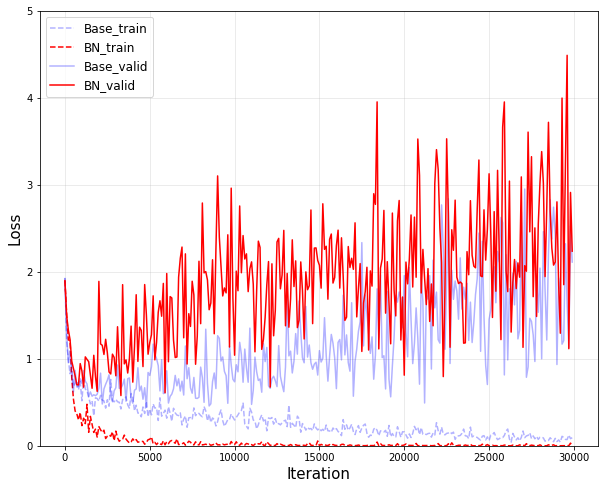

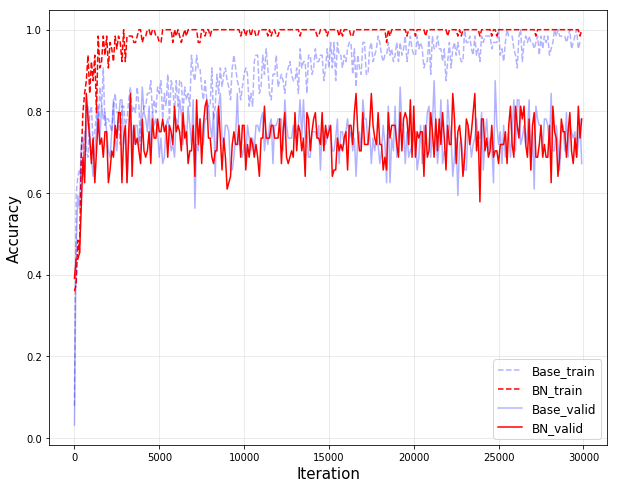

In [45]:
base_alpha = 0.3
bn_alpha = 1

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_n_record_train))*n_prt, loss_n_record_train, 'b--', alpha = base_alpha, label = 'Base_train')
plt.plot(np.arange(len(BN_loss_record_train))*n_prt, BN_loss_record_train, 'r--', alpha = bn_alpha, label = 'BN_train')
plt.plot(np.arange(len(loss_n_record_valid))*n_prt, loss_n_record_valid, 'b-', alpha = base_alpha, label = 'Base_valid')
plt.plot(np.arange(len(BN_loss_record_valid))*n_prt, BN_loss_record_valid, 'r-', alpha = bn_alpha, label = 'BN_valid')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.ylim([0, 5])
plt.legend(fontsize = 12)
plt.grid(alpha = 0.3)
plt.show()
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(accr_n_record_train))*n_prt, accr_n_record_train, 'b--', alpha = base_alpha, label = 'Base_train')
plt.plot(np.arange(len(BN_accr_record_train))*n_prt, BN_accr_record_train, 'r--', alpha = bn_alpha, label = 'BN_train')
plt.plot(np.arange(len(accr_n_record_valid))*n_prt, accr_n_record_valid, 'b-', alpha = base_alpha, label = 'Base_valid')
plt.plot(np.arange(len(BN_accr_record_valid))*n_prt, BN_accr_record_valid, 'r-', alpha = bn_alpha, label = 'BN_valid')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(alpha = 0.3)
plt.show()